In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Project Part 2 - Exploratory Data Analysis

In [2]:
df = pd.read_csv('datasets/glassdoor_data_cleaned.csv')
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,state,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,91000,72000.0,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,112000,87500.0,MD,0,37,1,0,0,0,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,90000,85000.0,FL,1,11,1,0,1,0,1
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,...,97000,76500.0,WA,1,56,1,0,0,0,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,143000,114500.0,NY,1,23,1,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer', 'min_salary',
       'max_salary', 'avg_salary', 'state', 'at_headquarters', 'company_age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
def get_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def get_seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
# retrieve job position names
df['job_simp'] = df['Job Title'].apply(get_title)
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,avg_salary,state,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel,job_simp
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,72000.0,NM,0,48,1,0,0,0,1,data scientist
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,87500.0,MD,0,37,1,0,0,0,0,data scientist
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,85000.0,FL,1,11,1,0,1,0,1,data scientist
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,...,76500.0,WA,1,56,1,0,0,0,0,data scientist
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,114500.0,NY,1,23,1,0,0,0,1,data scientist


In [6]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [7]:
# same with seniority

df['seniority'] = df['Job Title'].apply(get_seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,state,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,NM,0,48,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,MD,0,37,1,0,0,0,0,data scientist,na
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,FL,1,11,1,0,1,0,1,data scientist,na
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,...,WA,1,56,1,0,0,0,0,data scientist,na
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,NY,1,23,1,0,0,0,1,data scientist,na


In [9]:
# fixing incorrect LA formatting in states
df['state']= df.state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
DE      6
MI      6
KY      6
GA      6
IA      5
CT      5
OR      4
NE      4
LA      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: state, dtype: int64

##### Later it would be interesting to see whether companies that write super in-depth descriptions tend to have higher salary proposals

In [10]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
print(df['desc_len'].describe())
df['desc_len']

count      742.000000
mean      3869.545822
std       1521.495868
min        407.000000
25%       2801.000000
50%       3731.000000
75%       4740.000000
max      10051.000000
Name: desc_len, dtype: float64


0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [14]:
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer,min_salary,max_salary,avg_salary,state,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53000,91000,72000.0,NM,0,48,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63000,112000,87500.0,MD,0,37,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80000,90000,85000.0,FL,1,11,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56000,97000,76500.0,WA,1,56,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86000,143000,114500.0,NY,1,23,1,0,0,0,1,data scientist,na,2728,3


In [15]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

# min salary is no longer higher than max salary

,hourly,min_salary,max_salary
165,1,34000,48000
177,1,42000,68000
197,1,36000,50000
202,1,42000,68000
210,1,30000,50000
246,1,34000,48000
271,1,42000,68000
337,1,36000,50000
345,1,48000,78000
357,1,42000,68000


In [16]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [17]:
df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [18]:
df.describe()

,Rating,Founded,hourly,employer,min_salary,max_salary,avg_salary,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74719.676550,128149.595687,100626.010782,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30980.593219,45220.324257,38855.948157,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15000.000000,16000.000000,13500.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52000.000000,96000.000000,73500.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69500.000000,124000.000000,97500.000000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91000.000000,155000.000000,122500.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202000.000000,306000.000000,254000.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


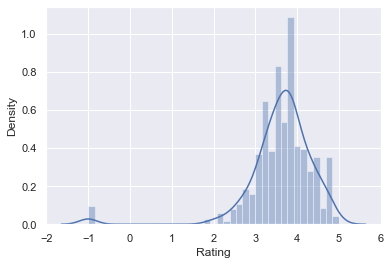

In [19]:
import warnings
warnings.filterwarnings("ignore")

_ = sns.distplot(df['Rating'])

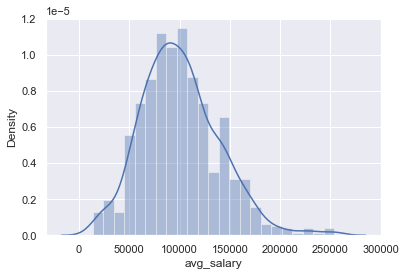

In [20]:
_ = sns.distplot(df['avg_salary'])

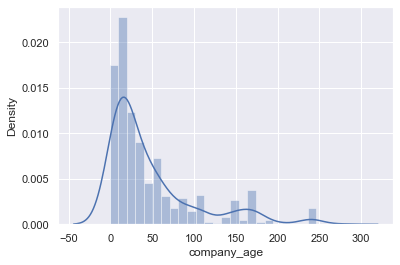

In [21]:
_ = sns.distplot(df['company_age'])

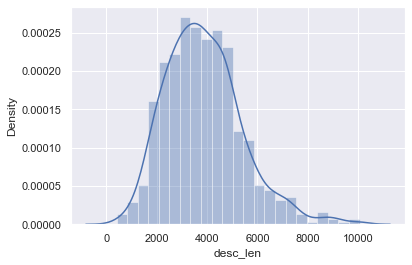

In [22]:
_ = sns.distplot(df['desc_len'])

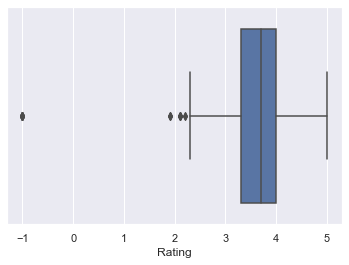

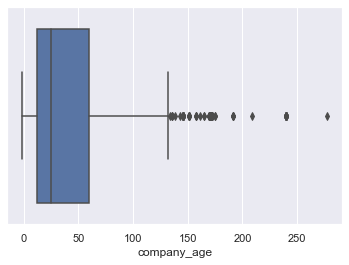

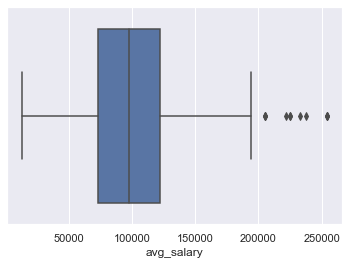

In [23]:
vars = ['Rating', 'company_age', 'avg_salary']
for var in vars:
    sns.boxplot(df[var])
    plt.show()

##### Company age seems to have highest number of outliers, as there are quite a lot of old companies

In [24]:
df[['company_age','avg_salary','Rating','desc_len']].corr()

,company_age,avg_salary,Rating,desc_len
company_age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


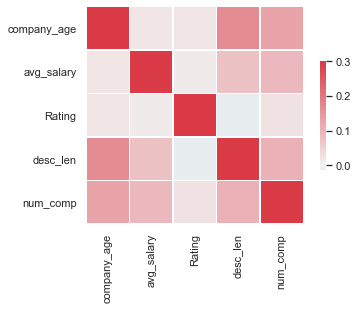

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(df[['company_age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer', 'min_salary',
       'max_salary', 'avg_salary', 'state', 'at_headquarters', 'company_age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [27]:
# extracting categorical columns

df_cat = df[['Size','Location','Type of ownership','Headquarters', 'Industry', 'Sector', 'Revenue', 'Company Name', 'state','at_headquarters', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Size: total = 9


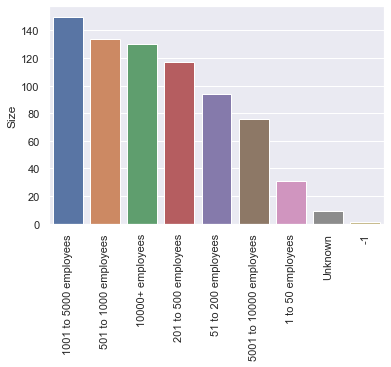

graph for Location: total = 200


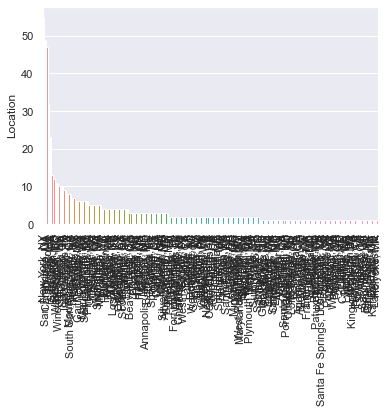

graph for Type of ownership: total = 11


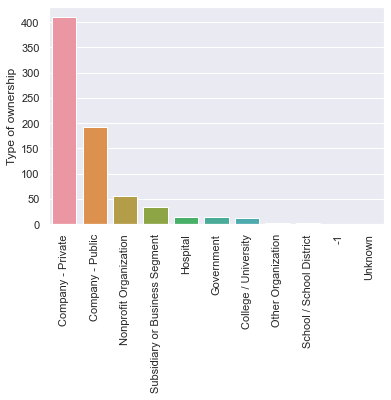

graph for Headquarters: total = 198


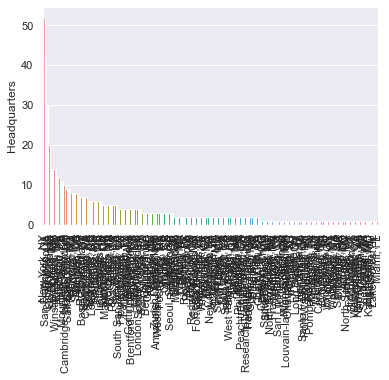

graph for Industry: total = 60


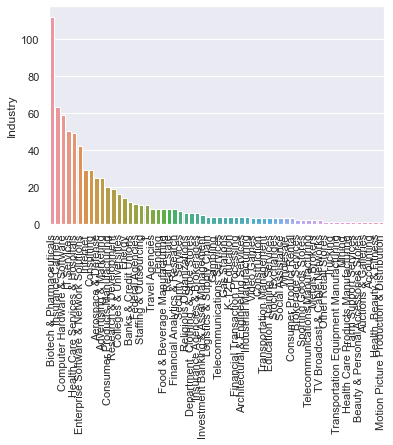

graph for Sector: total = 25


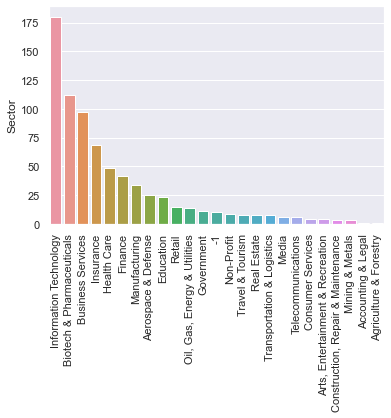

graph for Revenue: total = 14


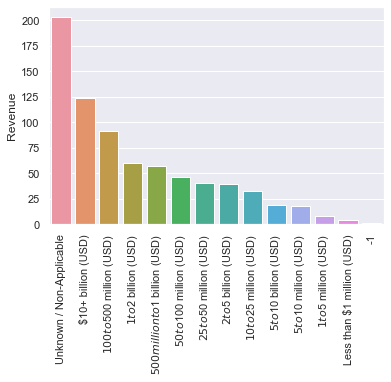

graph for Company Name: total = 343


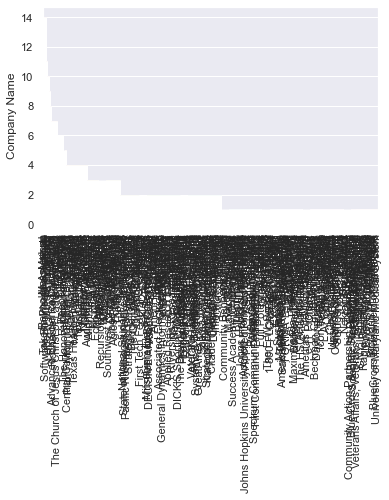

graph for state: total = 37


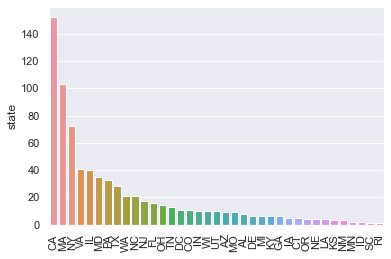

graph for at_headquarters: total = 2


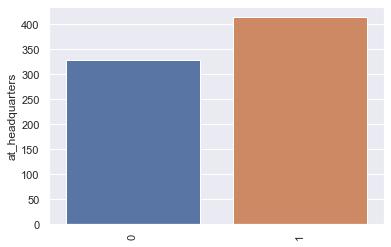

graph for python_yn: total = 2


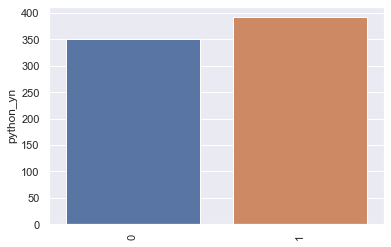

graph for R_yn: total = 2


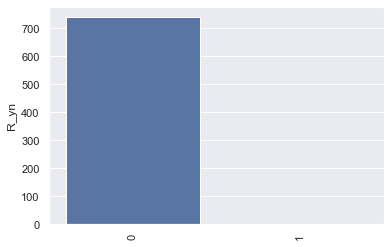

graph for spark: total = 2


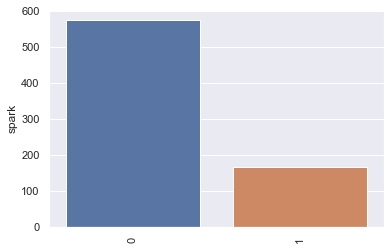

graph for aws: total = 2


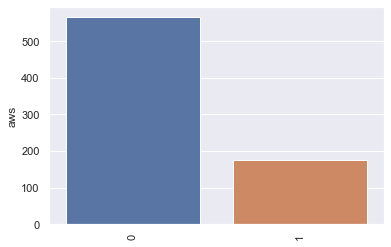

graph for excel: total = 2


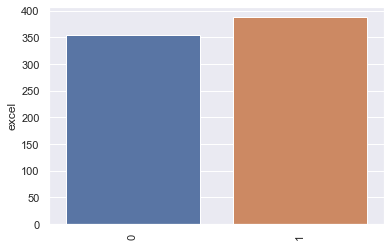

graph for job_simp: total = 7


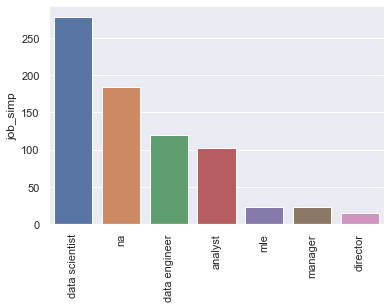

graph for seniority: total = 3


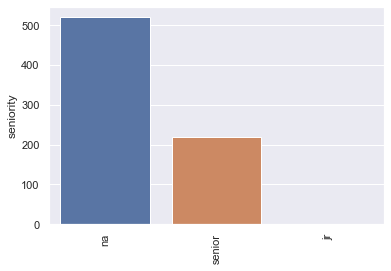

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


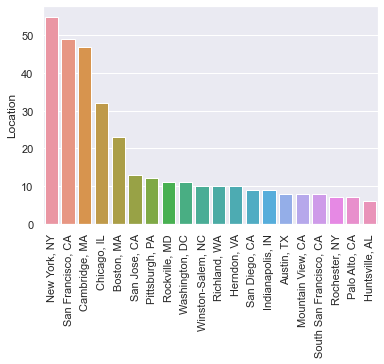

graph for Headquarters: total = 20


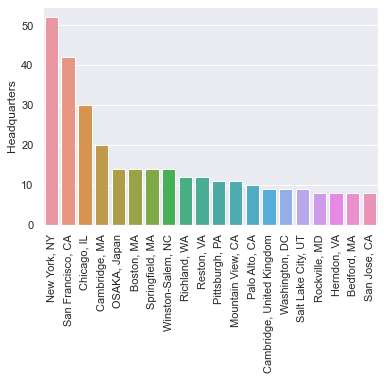

graph for Company Name: total = 20


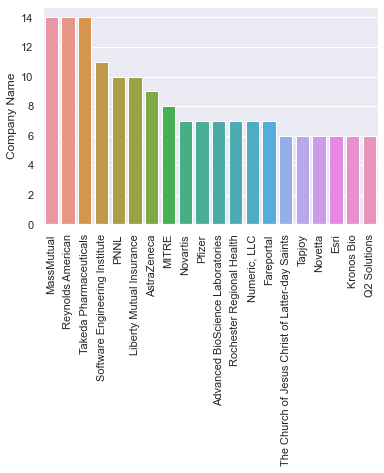

In [29]:
for i in df_cat[['Location','Headquarters','Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for {}: total = {}".format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Let's see how average salary varies depending on job position

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65857.843137
data engineer,105403.361345
data scientist,117564.516129
director,168607.142857
manager,84022.727273
mle,126431.818182
na,84853.260870


#### considering seniority

In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority               
analyst        jr          56500.000000
               na          61155.405405
               senior      79092.592593
data engineer  na          96701.219512
               senior     124689.189189
data scientist jr         106500.000000
               na         107043.010753
               senior     138956.521739
director       na         168607.142857
manager        na          84022.727273
mle            na         119133.333333
               senior     142071.428571
na             na          73988.188976
               senior     109061.403509

#### Average salary per state

In [32]:
pd.pivot_table(df, index = ['state','job_simp'], values = 'avg_salary').sort_values('state', ascending = False)

avg_salary
state job_simp                     
WI    na               54000.000000
      data scientist  113500.000000
      analyst          58833.333333
WA    na               97500.000000
      data scientist   99764.705882
...                             ...
AZ    analyst          55000.000000
      na              124500.000000
AL    na               43750.000000
      data engineer    65000.000000
      analyst          62200.000000

[114 rows x 1 columns]

In [33]:
pd.pivot_table(df, index = ['state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('state', ascending = False)

avg_salary
state job_simp                  
WI    na                       4
      data scientist           3
      analyst                  3
WA    na                       1
      data scientist          17
...                          ...
AZ    analyst                  1
      na                       2
AL    na                       2
      data engineer            1
      analyst                  5

[114 rows x 1 columns]

##### Let's see how the numbers change when we filter for only data scientists

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
state,
DC,149000.000000
CA,142522.058824
UT,140500.000000
MO,127666.666667
IL,117233.333333
NC,117000.000000
NY,115250.000000
MA,113750.000000
WI,113500.000000


In [36]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer', 'min_salary',
       'max_salary', 'avg_salary', 'state', 'at_headquarters', 'company_age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

###### Let's now loop through [rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership] and automate pivot table creation to see how average salaries are influenced by different variables

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [38]:
for feature in df_pivots.columns:
    print('\n' + '\033[1m' + feature +':' + '\033[0m'+'\n') #weird strings are for bold text
    print(pd.pivot_table(df_pivots,index =feature, values = 'avg_salary').sort_values('avg_salary', ascending = False))


Rating:

           avg_salary
Rating               
-1.0    136181.818182
 5.0    134700.000000
 2.5    120000.000000
 4.5    117714.285714
 4.1    116368.421053
 3.9    113071.428571
 2.6    109083.333333
 4.4    108606.060606
 3.2    105500.000000
 4.0    105340.425532
 3.5    104897.959184
 3.7    104131.147541
 4.7    103983.870968
 4.3    102468.750000
 3.3    101858.974359
 4.2    100442.307692
 2.2     97750.000000
 4.6     97250.000000
 3.8     96811.475410
 2.1     95900.000000
 3.4     93011.363636
 1.9     87500.000000
 3.1     86580.000000
 3.0     85588.235294
 3.6     85467.391304
 2.8     83928.571429
 2.7     83250.000000
 2.3     81500.000000
 2.9     81138.888889
 4.8     80277.777778
 2.4     60214.285714

Industry:

                                             avg_salary
Industry                                               
Other Retail Stores                       163500.000000
Motion Picture Production & Distribution  146000.000000
Financial Analytics & Resear

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

In [54]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
words = " ".join(df['Job Description'])

In [56]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [57]:
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

#### Run these two below if the above code does not work

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/papunaabesadze/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/papunaabesadze/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

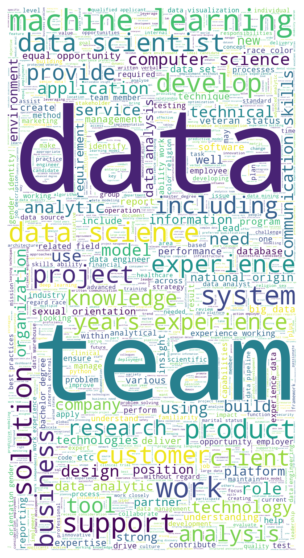

In [59]:
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Conclusion

As one would expect California leads the category of most job positions offered with a little more than 20% of the total job postings. other states with the largest cities in the country also top this list like Massachusetts, New York, and Illinois.

If you're looking for a data science position your best bet is somewhere near one of the larger cities. only about 25% of the jobs are located outside of the top 10 states on this list.

If one looks at who's hiring, from the sample it looks like medium-sized companies are hiring the most data scientists, private companies are also taking the lead, with almost half of all data science jobs being hired by private organizations. companies in information technology, biotech, business services, insurance, health care and Finance top the list of the most popular jobs by sector. if you have a hybrid skillset where you have experience with one of these domains it could probably help you create an opportunity for yourself. it should be noted that these can be slightly skewed by the type of companies that would post their jobs online. small companies are likely underrepresented here because they're less likely to post their jobs on websites like Glassdoor or LinkedIn.

 In terms of programming skills, Python and SQL are independently mentioned in over 50 percent of the job postings, R is also in high demand being asked for, about 30% of the time Scala and Java are also mentioned around 20% of the time. for data manipulation tools Excel is still king, which is rather surprising, it's mentioned in just over 50% of the total job postings and in 49 percent of the data science specific job postings. Next is tableau at 20%, power bi at 8%, and click at 3% for the cloud. computing spark and AWS were both mentioned around 20% at a time. 

Regarding educational requirements, for these jobs, the vast majority - 95% mentioned a master's degree and 27% mentioned a Ph.D. (which I hope are merely preferred requirements for the position which one does not necessarily have to meet, as I’m at the end of my Bachelor’s and trying to find an internship at the time of writing this, but then again, the data is collected in the US)

when it comes to expected salaries across the job types and locations from the estimates on Glassdoor, it looks like directors make the most, followed by machine learning engineers and then data scientists. what was surprising to me was that the managers were expected to make significantly less than the data scientists and machine learning engineers they are managing. 

Regarding data science salary, by the state, it appears the Washington DC and California lead this list. what was unexpected, was that New York and Massachusetts offered significantly lower salaries even though they have a very high cost of living. 